
> # **<center>  Gold Price Prediction.</center>**
> ## ***Mohammed Mahameed***

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

This DataSet includes the real time gold prices(in USD) from 1979 to 2018.
- Date - Date on which Price is Noted
- open - open price of a Gold on that particular day
- High - High price of Gold on that particular day
- Low - Low price of Gold on that particular day
- Price - Gold price on that particular day

In [392]:
df = pd.read_csv("Gold_Price 2.csv")

***
> # EDA
***

In [11]:
df.head()

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.4,1223.4,1216.2
1,"Jul 31, 2018",1223.7,1220.4,1228.1,1213.0
2,"Jul 30, 2018",1221.3,1222.5,1223.9,1218.1
3,"Jul 27, 2018",1222.2,1223.5,1226.8,1216.7
4,"Jul 26, 2018",1225.3,1227.8,1227.8,1227.8


In [13]:
df.describe()

,Price,Open,High,Low
count,9771.000000,9771.000000,9771.000000,9771.000000
mean,638.922221,639.059523,641.936432,635.853220
std,419.776826,419.894281,422.504386,416.955696
min,253.000000,252.900000,252.900000,252.500000
25%,351.150000,351.200000,352.000000,350.500000
50%,407.900000,407.800000,409.000000,406.300000
75%,926.750000,926.000000,932.550000,920.500000
max,1888.700000,1909.000000,1911.600000,1864.000000


In [16]:
df.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

## The price distribution

D:\Installed programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price Distribution')

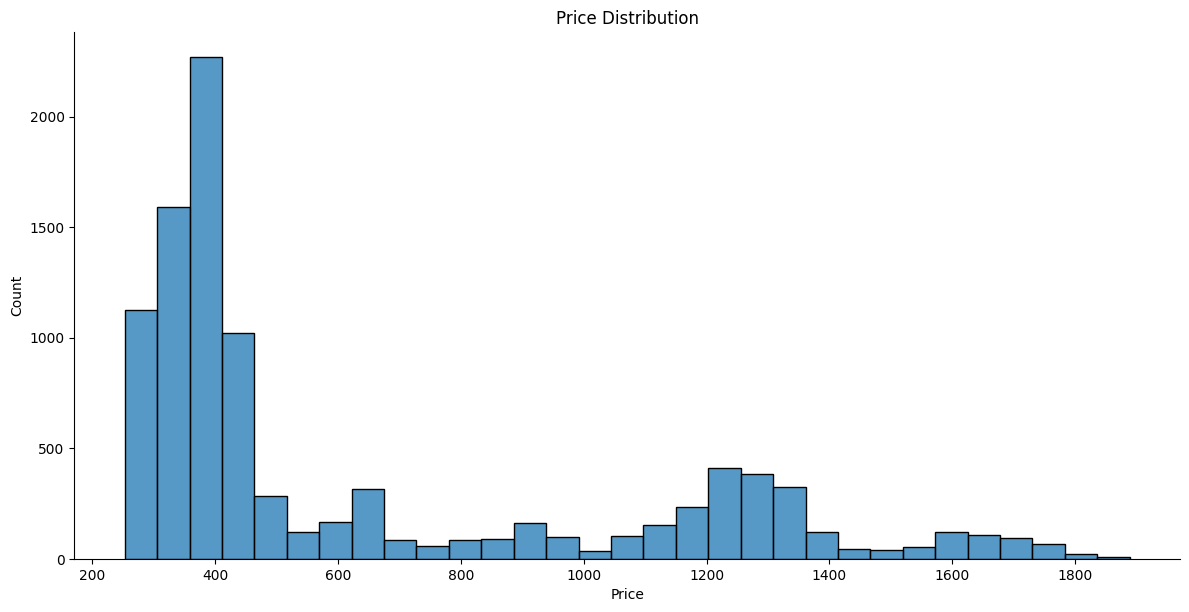

In [117]:
sns.displot(df, x='Price', aspect=2, height=6)
plt.title("Price Distribution")

D:\Installed programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\imohd\AppData\Local\Temp\ipykernel_17064\3922813643.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

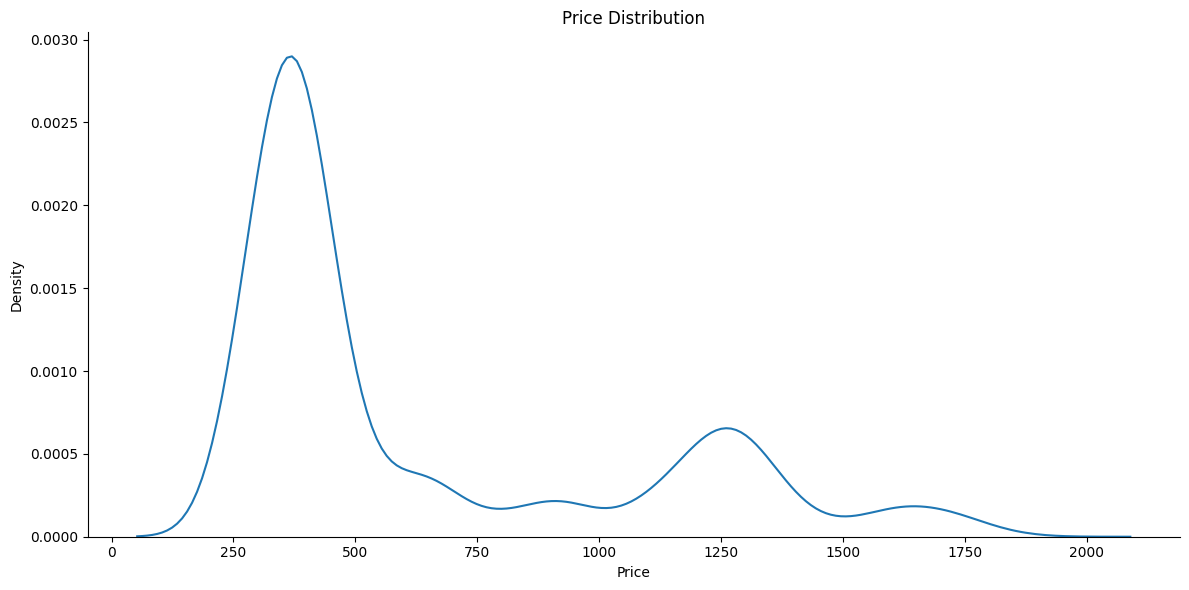

In [207]:
plt.figure(figsize=(12,8))
sns.displot(df['Price'], kind='kde', aspect=2, height=6)
plt.title("Price Distribution")
plt.tight_layout()

### Number of Unique Values in Date Column

In [393]:
df['Date'].nunique()

9771

### Creating a New Column "Year" That Contains of The Year Only  

In [394]:
df['Year'] = df['Date'].apply(lambda y: int(y[-4:]))

In [395]:
df.head()

,Date,Price,Open,High,Low,Year
0,"Aug 01, 2018",1216.6,1223.4,1223.4,1216.2,2018
1,"Jul 31, 2018",1223.7,1220.4,1228.1,1213.0,2018
2,"Jul 30, 2018",1221.3,1222.5,1223.9,1218.1,2018
3,"Jul 27, 2018",1222.2,1223.5,1226.8,1216.7,2018
4,"Jul 26, 2018",1225.3,1227.8,1227.8,1227.8,2018


### Decreacing The Number of Unique Values from 9771 to 40

In [396]:
df['Year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980, 1979], dtype=int64)

In [397]:
df['Year'].nunique()

40

### Displaying The Price Mean Status Through out the Years

In [398]:
year_by_price = df.groupby('Year').mean('Price')['Price']
year_by_price.head()

Year
1979    522.300000
1980    611.959921
1981    458.490514
1982    375.563745
1983    423.452964
Name: Price, dtype: float64

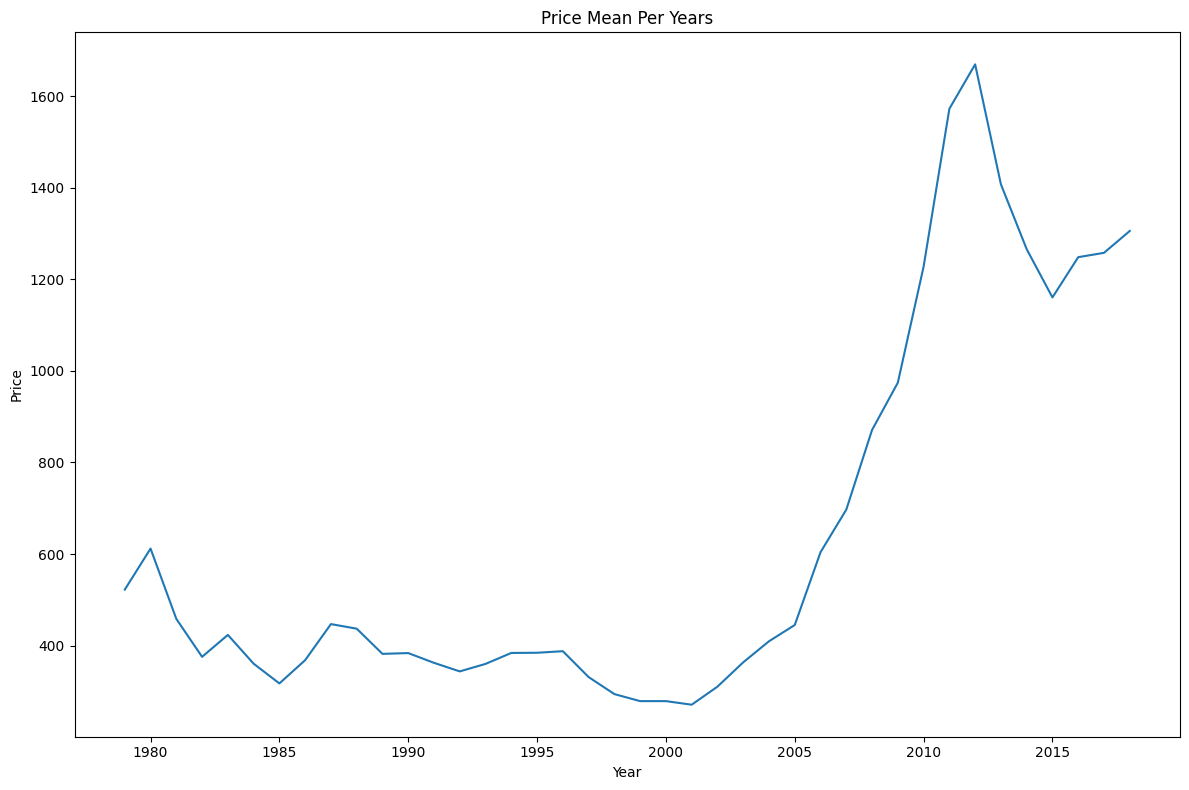

In [399]:
plt.figure(figsize=(12,8))
sns.lineplot(year_by_price)
plt.title("Price Mean Per Years")
plt.tight_layout()

***
> # Feature Engineering
***

### Converting The Type of Date Column Into DateTime Type

In [400]:
df['Date'] = pd.to_datetime(df['Date'])

In [401]:
df['Date'].head()

0   2018-08-01
1   2018-07-31
2   2018-07-30
3   2018-07-27
4   2018-07-26
Name: Date, dtype: datetime64[ns]

### Creating a Month Column

In [402]:
df['Month'] = df['Date'].apply(lambda m: m.month)

In [403]:
df['Month'].head()

0    8
1    7
2    7
3    7
4    7
Name: Month, dtype: int64

### Displaying The Price Line Based on Specific Month

In [404]:
month_by_price = df.groupby('Month').mean('Price')['Price']
month_by_price

Month
1     641.647871
2     652.581135
3     637.002931
4     638.647958
5     644.733505
6     634.602038
7     639.056159
8     628.002850
9     642.338740
10    633.592509
11    643.193329
12    633.502927
Name: Price, dtype: float64

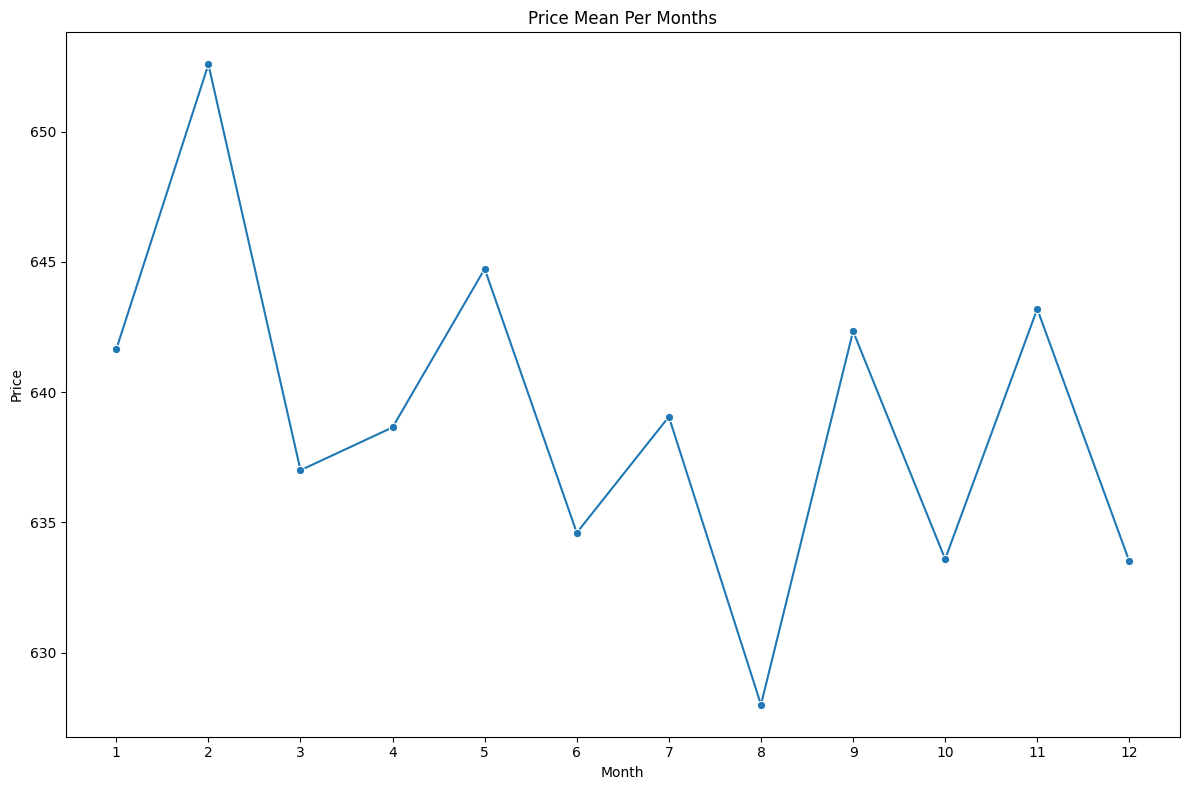

In [405]:
plt.figure(figsize=(12,8))
sns.lineplot(month_by_price, marker='o')
plt.xticks(np.arange(1, 13, 1))
plt.title("Price Mean Per Months")
plt.tight_layout()

### Deleting Unnecessary Columns

### Since we Extracted The Months and The Years for Date Column, it is for Better Removing the Date Column, it is Unnecessary.

In [406]:
df.drop('Date', axis=1, inplace=True)

### Here is Our Final Data

In [407]:
df.head()

,Price,Open,High,Low,Year,Month
0,1216.6,1223.4,1223.4,1216.2,2018,8
1,1223.7,1220.4,1228.1,1213.0,2018,7
2,1221.3,1222.5,1223.9,1218.1,2018,7
3,1222.2,1223.5,1226.8,1216.7,2018,7
4,1225.3,1227.8,1227.8,1227.8,2018,7


***
> # Buiding The Model
***

### Dividing The Data Into Features and Label

In [781]:
X = df.drop('Price', axis=1)
y= df['Price']

In [782]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [783]:
scaler = MinMaxScaler()

In [784]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [786]:
from sklearn.svm import SVR

In [787]:
model = SVR()

In [788]:
model.fit(X_train, y_train)

SVR()

In [789]:
prediction = model.predict(X_test)

In [790]:
prediction[:10]

array([ 473.00784517,  367.19454379,  350.18637099,  365.39996779,
       1244.26664767,  390.10043417, 1185.38254725, 1253.50283437,
       1321.4981064 ,  362.89277387])

***
> # Model Evaluation 
***

In [791]:
r_squared = r2_score(y_test, prediction)
print("R-Squared Score: {:.2f}".format(r_squared))

R-Squared Score: 0.94


In [792]:
MAE = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error: {:.2f}".format(MAE))

Mean Absolute Error: 46.52


In [793]:
MSE = mean_squared_error(y_test, prediction)
print("Mean Squared Error: {:.2f}".format(MSE))

Mean Squared Error: 10652.38


In [794]:
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
print("Root Mean Squared Error: {:.2f}".format(RMSE))

Root Mean Squared Error: 103.21


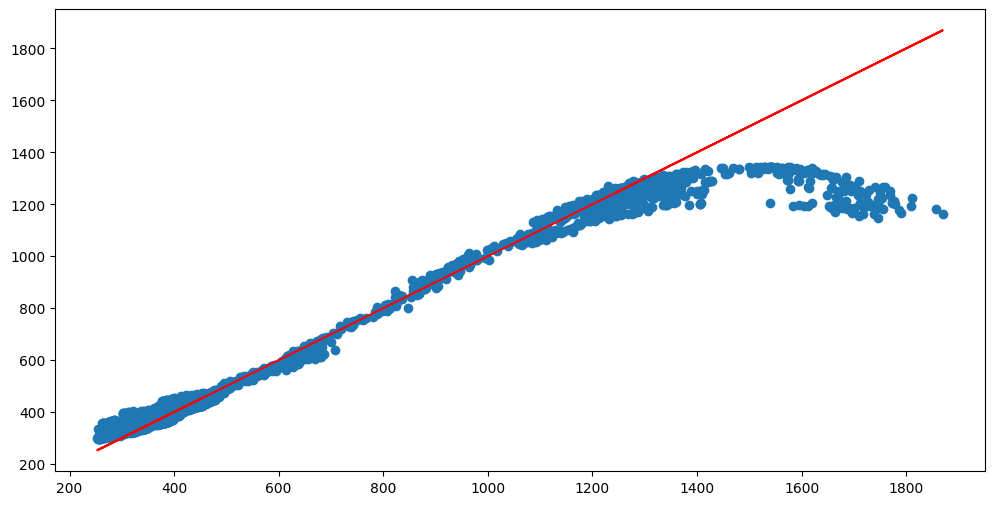

In [795]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')

### Prediction on New Values

In [796]:
gold_val = df.drop('Price', axis=1).iloc[0]

In [797]:
gold_val

Open     1223.4
High     1223.4
Low      1216.2
Year     2018.0
Month       8.0
Name: 0, dtype: float64

In [798]:
gold_val = scaler.transform(gold_val.values.reshape(-1,5))

D:\Installed programs\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [799]:
print("The Predicted House Price: ${:,.2f}".format(model.predict(gold_val)[0]))

The Predicted House Price: $1,226.16


In [800]:
print("The Actual House Price: ${:,.2f}".format(df.head(1)['Price'][0]))

The Actual House Price: $1,216.60
